In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
file = r"C:\Users\root\Documents\Git\bot_spacerman\spacerman_ai\machine_models\Friday\ocr_exports\export__20230103_022928.csv"

In [28]:
df =  pd.read_csv(file, sep='|')
df1 = df
df1 = df1[df1['type'] == 'crash']
df1 = df1[df1['crash_value'] > 0]
df1.drop('Unnamed: 0', inplace=True, axis=1)
df1.drop('type', inplace=True, axis=1)
df1.drop('extension', inplace=True, axis=1)
df1.drop('filename', inplace=True, axis=1)
df1.drop('text', inplace=True, axis=1)
df1.head()

,year,month,day,hour,minutes,seconds,crash_value,sequence
1,2022,12,24,0,36,32,32.01,1
2,2022,12,24,0,37,24,1.51,2
3,2022,12,24,0,37,49,1.82,3
4,2022,12,24,0,38,16,1.78,4
5,2022,12,24,0,38,43,1.84,5


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2422 entries, 1 to 5527
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         2422 non-null   int64  
 1   month        2422 non-null   int64  
 2   day          2422 non-null   int64  
 3   hour         2422 non-null   int64  
 4   minutes      2422 non-null   int64  
 5   seconds      2422 non-null   int64  
 6   text         2422 non-null   object 
 7   crash_value  2422 non-null   float64
 8   sequence     2422 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 189.2+ KB


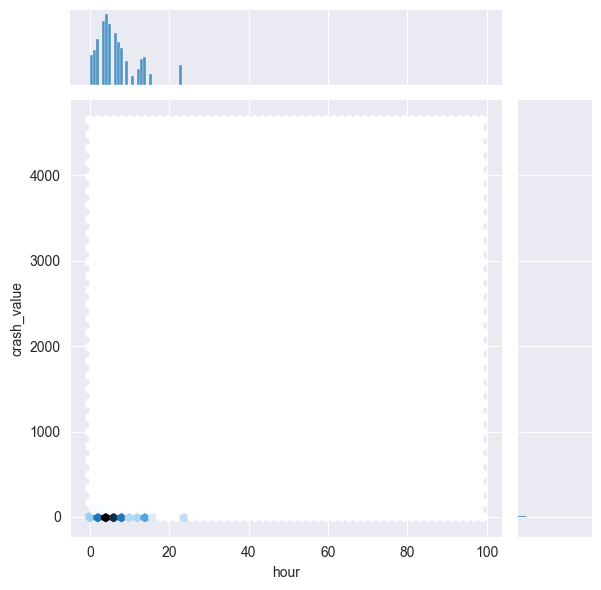

In [35]:
sns.jointplot(y='crash_value', x='hour', data=df1, kind='hex')

### Avaliação:
Preciso categorizar melhor os dados. Esta muito espalhado. Acabo ficando sem grafico.

In [57]:
def crash_classifier(x):
    if x == 1:
        return 0
    if 1 < x <= 2.1:
        return 1
    if 2.1 < x <= 3:
        return 2
    if 3 < x <= 5:
        return 3
    if 5 < x <= 10:
        return 4
    if 10 < x <= 20:
        return 5
    if 20 < x <= 50:
        return 6
    if 50 < x <= 150:
        return 7
    if 150 < x <= 500:
        return 8
    if x > 500:
        return 9
    return 999

In [58]:
df1['eval'] = df1.crash_value.apply(crash_classifier)

In [59]:
df1

,year,month,day,hour,minutes,seconds,crash_value,sequence,eval
1,2022,12,24,0,36,32,32.01,1,6
2,2022,12,24,0,37,24,1.51,2,1
3,2022,12,24,0,37,49,1.82,3,1
4,2022,12,24,0,38,16,1.78,4,1
5,2022,12,24,0,38,43,1.84,5,1
...,...,...,...,...,...,...,...,...,...
5523,2022,12,24,0,16,18,2.46,6,2
5524,2022,12,24,0,16,42,1.46,7,1
5525,2022,12,24,0,17,7,1.41,8,1
5526,2022,12,24,0,17,43,4.86,9,3


agora acho que tenho uma variável

<AxesSubplot: xlabel='hour', ylabel='crash_value'>

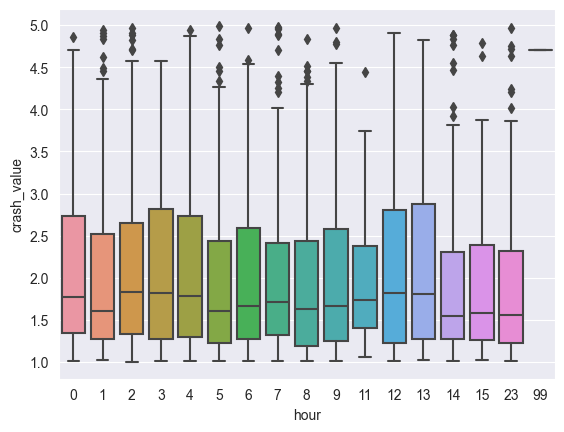

In [64]:
df2 = df1[df1['eval'].apply(lambda x: x <= 3)]

sns.boxplot(data=df2, x='hour', y='crash_value')

Fazer essa avaliação para cada faixa apara saber a melhor hora para cada faixa.

<AxesSubplot: xlabel='hour', ylabel='count'>

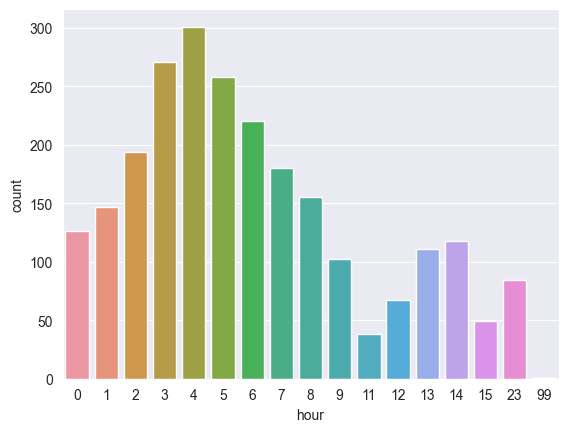

In [20]:
sns.countplot(x='hour', data=df1)

## Minha avaliação

Preciso coletar daddos de 8hs as 01hs